# <big>Main Text</big>

Code to generate Figures 2, 3, 5, 7–9, Table 1, and miscellaneous results.

# Contents

* Figure 2
* Table 1
* Figure 3
* Figure 5
* Figure 7
* Figure 8
* Figure 9

# Load packages

In [1]:
run RNA_simulation.py

In [2]:
%matplotlib inline
%load_ext rpy2.ipython
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set_context("notebook", font_scale=3)
sns.set_style("ticks", {'axes.linewidth': 4, 'axes.edgecolor': 'grey', 
    'xtick.major.size': 20, 'ytick.color': 'grey', 'ytick.major.size': 20, 
    'xtick.color': 'grey'})

# Load data

In [4]:
path = 'stats/bp_12/'
stat = {}
count = 0
for filename in os.listdir(path):
    name = path + filename
    if os.path.getsize(name) > 0:
        file = open(name, 'r')
        run = pickle.load(file)
        stat[count] = run
        file.close()
        count += 1

# Figure 2: Inviable introgressions snowball in the RNA model

In [5]:
single = []
for i in stat.values():
    a = np.array([len(j) for j in i['single']])
    b = np.array([len(j) for j in i['single_inv']])
    single.append((a + b) / 2.)
single = pd.DataFrame(single)

In [6]:
double = []
for i in stat.values():
    a = np.array([len(j) for j in i['double']])
    b = np.array([len(j) for j in i['double_inv']])
    double.append((a + b) / 2.)
double = pd.DataFrame(double)

In [7]:
triple = []
for i in stat.values():
    a = np.array([len(j) for j in i['triple']])
    b = np.array([len(j) for j in i['triple_inv']])
    triple.append((a + b) / 2.)
triple = pd.DataFrame(triple)

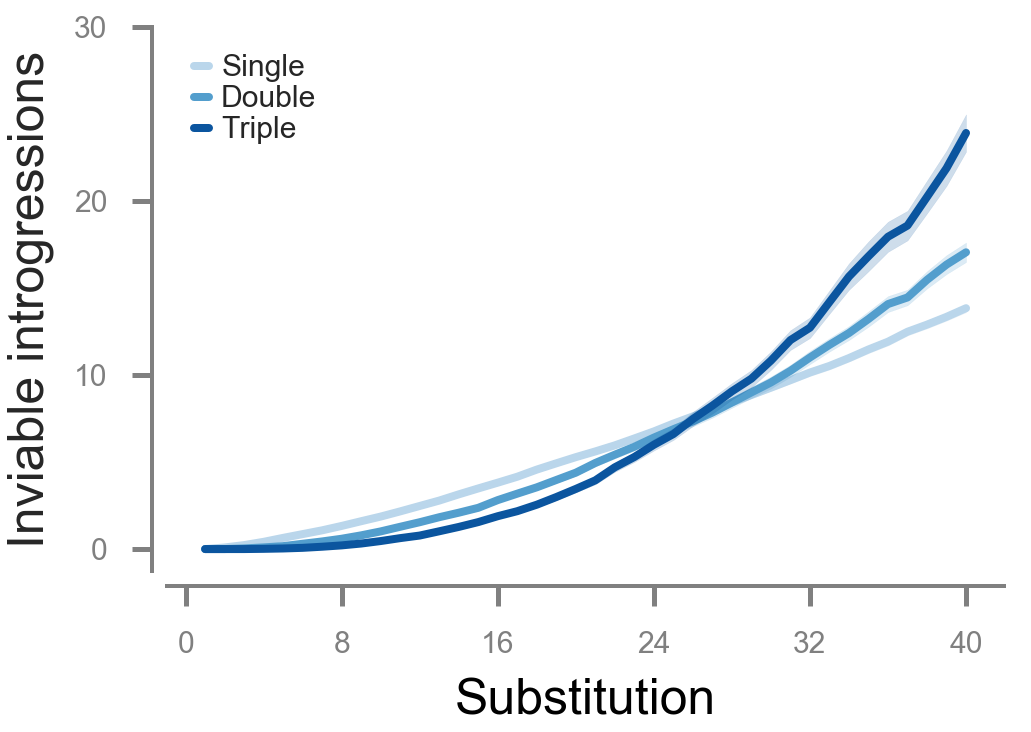

In [8]:
x = np.arange(1, 41, 1)
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['left'].set_linewidth(4)
ax.spines['bottom'].set_linewidth(4)
ax.spines['bottom'].set_color('grey')
ax.spines['left'].set_color('grey')
ax.spines['left'].set_position(('outward', 15))
ax.spines['bottom'].set_position(('outward', 15))

col = (0.73094965079251462, 0.83947713375091548, 0.92132257293252384)
err0 = 1.96* single.std() / np.sqrt(len(single))
plt.errorbar(x, single.mean(), linewidth=8, clip_on=False, color=col, zorder=2, 
    label=r'Single')
ax.fill_between(x, single.mean() - err0, single.mean() + err0, alpha=.2, 
    zorder=2, color=col)

col = (0.32628989885835086, 0.61862362903707169, 0.80279893524506507)
err1 = 1.96* double.std() / np.sqrt(len(double))
plt.errorbar(x, double.mean(), linewidth=8, clip_on=False, color=col, zorder=3, 
    label=r'Double')
ax.fill_between(x, double.mean() - err1, double.mean() + err1, alpha=.2, 
    zorder=3, color= col)

col = (0.044059979477349451, 0.33388697645243476, 0.62445215617909156)
err2 = 1.96* triple.std() / np.sqrt(len(triple))
plt.errorbar(x, triple.mean(), linewidth=8, clip_on=False, color=col, zorder=4, 
    label=r'Triple')
ax.fill_between(x, triple.mean() - err2, triple.mean() + err2, alpha=.2, 
    zorder=4, color=col)

plt.tick_params(axis='x', which='both', bottom='on', top='off',
    labelbottom='on', size=20, width=5, direction='out', pad=25, colors='grey')
plt.tick_params(axis='y', which='both', left='on', right='off',
    labelbottom='on', size=20, width=5, direction='out', pad=25, colors='grey')
plt.ylabel(r'Inviable introgressions', fontsize= 50, labelpad=20)
plt.xlabel(r'Substitution', fontsize= 50, labelpad=20)
plt.yticks(np.linspace(0, 30, 4))
plt.xticks(np.linspace(0, 40, 6))

ax.xaxis.label.set_color('black')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles,labels, loc='upper left', handlelength=0.5, 
    handletextpad=0.4, framealpha=0, labelspacing=0.1,
    numpoints=1, markerscale=0.3);

# Table 1: Estimates of the parameters in Equation 6

Equation 6:

$$ J_k^{(i)} = a_i (k - i)^{b_i}$$

where $J_k^{(i)}$ is the number of inviable introgressions of $i$ alleles, $k$ is the number of substitutions (divergence), and $a_i$ and $b_i$ are parameters.

The model was fitted by non-linear least-squares regression to the average numbers of inviable single, double, and triple introgressions shown in Figure 2.

## Single introgressions $(i = 1)$

Estimates of $a_1$ and $b_1$

In [9]:
y = np.array(single.mean())
x = np.arange(1, 41, 1)

In [10]:
%%R -i x -i y
inv1 = nls(y ~ a1 * (x - 1) ^ b1, start=list(a1=.1, b1=.1))
summary(inv1)


Formula: y ~ a1 * (x - 1)^b1

Parameters:
    Estimate Std. Error t value Pr(>|t|)    
a1 0.0981903  0.0008753   112.2   <2e-16 ***
b1 1.3506579  0.0026090   517.7   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.0324 on 38 degrees of freedom

Number of iterations to convergence: 9 
Achieved convergence tolerance: 1.188e-06



95% CI for $a_1$ and $b_1$

In [11]:
%%R 
summary(inv1)$coefficients[,2] * qt(.975, summary(inv1)$df[2])

         a1          b1 
0.001771888 0.005281622 


## Double introgressions $(i = 2)$

In [12]:
y = np.array(double.mean())[1:]
x = np.arange(2, 41, 1)

In [13]:
%%R -i x -i y
inv2 = nls(y ~ a2 * (x - 2) ^ b2, start=list(a2=.1, b2=.1))
summary(inv2)


Formula: y ~ a2 * (x - 2)^b2

Parameters:
    Estimate Std. Error t value Pr(>|t|)    
a2 0.0229249  0.0006294   36.42   <2e-16 ***
b2 1.8169726  0.0079781  227.75   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.08637 on 37 degrees of freedom

Number of iterations to convergence: 10 
Achieved convergence tolerance: 8.067e-06



In [14]:
%%R 
summary(inv2)$coefficients[,2] * qt(.975, summary(inv2)$df[2])

         a2          b2 
0.001275328 0.016165177 


## Triple introgressions $(i = 3)$

In [15]:
y = np.array(triple.mean())[2:]
x = np.arange(3, 41, 1)

In [16]:
%%R -i x -i y
inv3 = nls(y ~ a3 * (x - 3) ^ b3, start=list(a3=.1, b3=.1))
summary(inv3)


Formula: y ~ a3 * (x - 3)^b3

Parameters:
    Estimate Std. Error t value Pr(>|t|)    
a3 0.0035604  0.0001979   17.99   <2e-16 ***
b3 2.4360026  0.0160739  151.55   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1679 on 36 degrees of freedom

Number of iterations to convergence: 15 
Achieved convergence tolerance: 2.447e-08



In [17]:
%%R 
summary(inv3)$coefficients[,2] * qt(.975, summary(inv3)$df[2])

          a3           b3 
0.0004013499 0.0325992802 


# Figure 3: Inviable single introgressions snowball in the RNA model, but more slowly than expected under the Orr model

Expected number of inviable single introgressions if all of them are caused by simple DMIs accumulating according to the Orr model (Equation 8):

$$ J_{k} = k - \frac{1 - (1 - p) ^ k}{p}$$

Fitting Equation 8 by nonlinear least-squares regression to the evolutionary response in inviable single introgressions shown in Figure 2 yields an estimate of $p = 0.0264$.

In [9]:
x = np.arange(1, 41, 1)
y = np.array(single.mean())

In [10]:
%%R -i x -i y
mod = nls(y ~ x - (1 - (1 - p) ^ x) / p, start=list(p=.1))
summary(mod)


Formula: y ~ x - (1 - (1 - p)^x)/p

Parameters:
   Estimate Std. Error t value Pr(>|t|)    
p 0.0263710  0.0005495   47.99   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7284 on 39 degrees of freedom

Number of iterations to convergence: 5 
Achieved convergence tolerance: 2.855e-07



In [11]:
%%R -o p
p = summary(mod)$coefficients[1]

In [12]:
def orr(k, p):
    '''
    Expected number of simple DMIs after k substitutions according to the 
    Orr (1995) model.
        
    Equation 2 in main text.
    
    Parameters
    ----------
    k : int
        Number of substitutions
    p : float
        Probability that there is a simple DMI between the latest derived 
        allele and one of the k alleles at the loci that have previously 
        undergone substitutions.
    '''
    return p * k * (k - 1.) / 2.

def inv_introgr(k, p):
    '''
    Expected number of inviable single introgressions after k substitutions 
    assuming that they are all based on simple DMIs evolving according to the
    Orr model.
        
    Equation 8 in main text.
    
    Parameters
    ----------
    See orr().
    '''
    return k - (1. - (1. - p) ** k) / p

If $p$ declines with divergence according to the relationship (Equation 9):

$$ p_k = p_0 + c k$$

where $c < 0$, the inviable single introgressions will accumulate more slowly.  

We estimate $p_0$ and $c$ by nonlinear least-squares regression.

In [13]:
def inv_introgr2(p0, c):
    '''
    Expected number of inviable single introgressions for k = 40 substitutions 
    assuming that they are all based on simple DMIs evolving according to the
    Orr model with a linearly changing p = p0 + c * k.
    
    Equation 9 in main text.
    
    Parameters
    ----------
    p0 : float
        Intercept.
    c : float
        Slope.
    '''
    J = [0]
    for k in range(1, 40):
        p = p0 + c * k
        J.append(J[k-1] + 1. - (1. - p) ** k)
    return np.array(J)

def fit_inv_introgr2(pars):
    '''
    Calculate the sum of squared deviations between the observed inviable 
    single introgression data and the expected values obtained from 
    inv_introgr2(p0, c).
    '''
    p0, c = pars
    return np.power(sin - inv_introgr2(p0, c), 2).sum()

def fit_inv_introgr2b(p0):
    '''
    As fit_inv_introgr2() but fixing c.
    '''
    c = -9.71532396e-05
    return np.power(sin - inv_introgr2(p0, c), 2).sum()

In [14]:
sin = np.array(single.mean())

In [15]:
coef = minimize(fit_inv_introgr2, [.02, 0])['x']
coef

array([ 0.04310086, -0.00081944])

In [16]:
coefb = minimize(fit_inv_introgr2b, .02)['x'][0]
coefb

0.028276572955710861

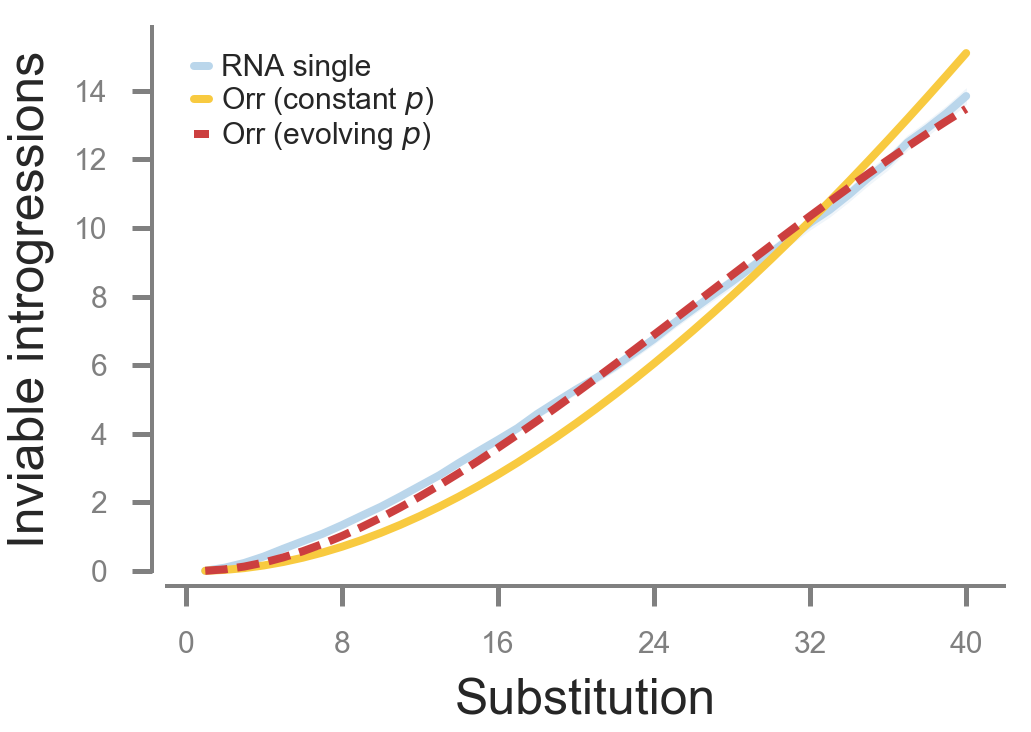

In [17]:
x = np.arange(1, 41, 1)
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['left'].set_linewidth(4)
ax.spines['bottom'].set_linewidth(4)
ax.spines['bottom'].set_color('grey')
ax.spines['left'].set_color('grey')
ax.spines['left'].set_position(('outward', 15))
ax.spines['bottom'].set_position(('outward', 15))

col = (0.73094965079251462, 0.83947713375091548, 0.92132257293252384)
err0 = 1.96 * single.std() / np.sqrt(len(single))
plt.errorbar(x, single.mean(), linewidth=8, clip_on=False, color=col, zorder=1, 
    label=r'RNA single')
ax.fill_between(x, single.mean() - err0, single.mean() + err0, alpha=.2, 
    zorder=1, color=col)

plt.errorbar(x, [inv_introgr(i, p[0]) for i in x], linewidth=8, clip_on=False, 
    color='#F8CA40', zorder=3, label='Orr (constant $p$)')

plt.errorbar(x, inv_introgr2(coef[0], coef[1]), linewidth=8, clip_on=False, 
    color='#CC3F3F', zorder=3, label='Orr (evolving $p$)', ls='--')

plt.tick_params(axis='x', which='both', bottom='on', top='off',
    labelbottom='on', size=20, width=5, direction='out', pad=25, colors='grey')
plt.tick_params(axis='y', which='both', left='on', right='off',
    labelbottom='on', size=20, width=5, direction='out', pad=25, colors='grey')
plt.ylabel(r'Inviable introgressions', fontsize= 50, labelpad=20)
plt.xlabel(r'Substitution', fontsize= 50, labelpad=20)
plt.xticks([  0.,   8.,  16.,  24.,  32.,  40], [  0,   8,  16,  24,  32,  40])
plt.ylim(0)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles,labels, loc='upper left', handlelength=0.5, 
    handletextpad=0.4, framealpha=0, labelspacing=0.1,
    numpoints=1., markerscale=1);

If $J_{k}$ evolved according to the yellow line, then $b_1 \approx 1.75$ in Equation 6.

In [18]:
x = np.arange(1, 41)
y = inv_introgr(x, p[0])

In [19]:
%%R -i x -i y
inv = nls(y ~ a * (x - 1) ^ b, start=list(a=.1, b=.1))
summary(inv)


Formula: y ~ a * (x - 1)^b

Parameters:
   Estimate Std. Error t value Pr(>|t|)    
a 0.0247004  0.0003425   72.11   <2e-16 ***
b 1.7528722  0.0040066  437.49   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.04087 on 38 degrees of freedom

Number of iterations to convergence: 11 
Achieved convergence tolerance: 9.892e-07



If $J_{k}$ evolved according to the red dashed line, then $b_1 \approx 1.39$ in Equation 6.

In [20]:
y = inv_introgr2(coef[0], coef[1]) 

In [21]:
%%R -i x -i y
inv = nls(y ~ a * (x - 1) ^ b, start=list(a=.1, b=.1))
summary(inv)


Formula: y ~ a * (x - 1)^b

Parameters:
  Estimate Std. Error t value Pr(>|t|)    
a 0.085869   0.005004   17.16   <2e-16 ***
b 1.389860   0.017031   81.61   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.207 on 38 degrees of freedom

Number of iterations to convergence: 9 
Achieved convergence tolerance: 2.098e-06



If $J_{k}$ evolved such that $p$ declined at the same rate as shown in Figure S3 (black line), then $b_1 \approx 1.71$ in Equation 6.

In [22]:
y = inv_introgr2(coefb, -9.71532396e-05) 

In [23]:
%%R -i x -i y
inv = nls(y ~ a * (x - 1) ^ b, start=list(a=.1, b=.1))
summary(inv)


Formula: y ~ a * (x - 1)^b

Parameters:
   Estimate Std. Error t value Pr(>|t|)    
a 0.0287749  0.0004764   60.41   <2e-16 ***
b 1.7083180  0.0047886  356.74   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.04978 on 38 degrees of freedom

Number of iterations to convergence: 11 
Achieved convergence tolerance: 9.569e-07



After $k=40$ substitutions in the RNA model most inviable single introgressions are *not* caused by simple DMIs

In [24]:
inv = []
DMIs = []
for i in stat.values():
    inv.append((len(i['single'][39]) + len(i['single_inv'][39])) / 2.)
    DMIs.append(len(i['simple_DMI'][39]))
print 'Single inv introgr:', np.mean(inv), 1.96 * np.std(inv) / np.sqrt(1000)
print '       Simple DMIs:', np.mean(DMIs), 1.96 * np.std(DMIs) / np.sqrt(1000)

Single inv introgr: 13.846 0.232570200616
       Simple DMIs: 0.6 0.0521522080069


In 57% of runs there were no simple DMIs after $k=40$ substitutions.

In [25]:
(np.array(DMIs) == 0).sum() / 1000.

0.56899999999999995

In [26]:
orr(40, p[0])

20.569397934711173

# Figure 5: The modified Orr model

In [27]:
def mod_orr(k, p, q):
    '''
    Expected number of simple DMIs after k substitutions according to the 
    modified Orr model.
        
    Equation 10 in main text.
    
    Parameters
    ----------
    k : int
        Number of substitutions
    p : float
        Probability that there is a simple DMI between the latest derived 
        allele and one of the k alleles at the loci that have previously 
        undergone substitutions.
    q : float
        Probability that a simple DMI present after k substitutions becomes 
        complex after the next substitution.
    '''
    return p * ((1 - q) ** k + k * q - 1) / q ** 2

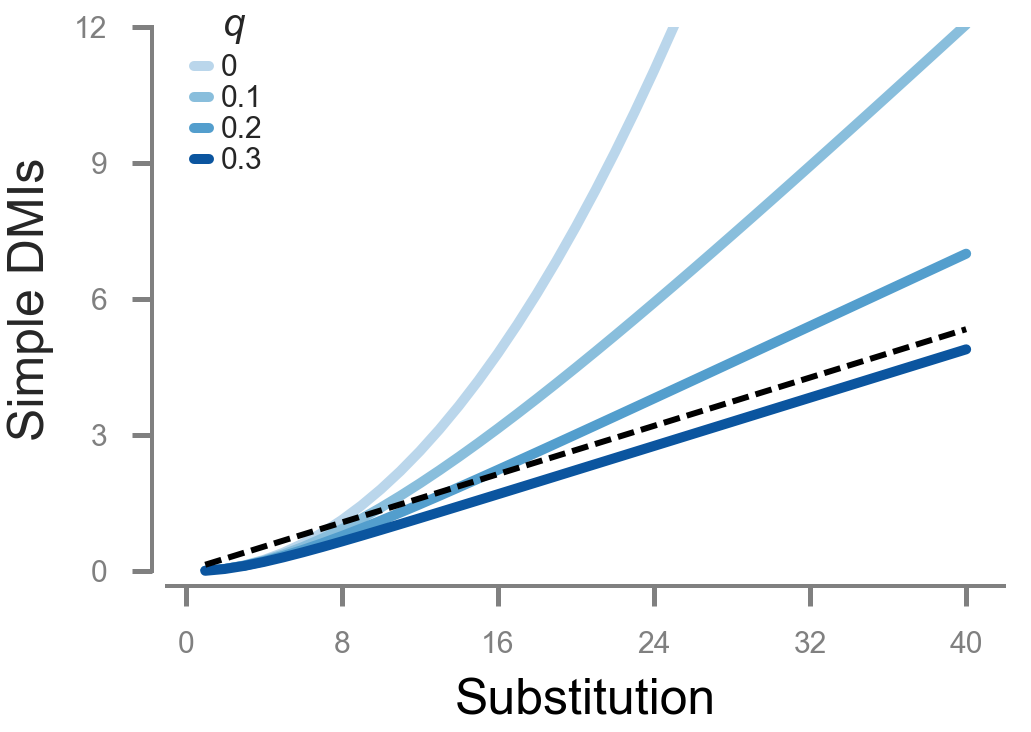

In [51]:
x = np.arange(1, 41, 1)
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['left'].set_linewidth(4)
ax.spines['bottom'].set_linewidth(4)
ax.spines['bottom'].set_color('grey')
ax.spines['left'].set_color('grey')
ax.spines['left'].set_position(('outward', 15))
ax.spines['bottom'].set_position(('outward', 15))

col = (0.73094965079251462, 0.83947713375091548, 0.92132257293252384)
plt.plot(x, [orr(i, 0.04) for i in x], color=col, linewidth=10, clip_on=True, 
    label=r'0')

col=(0.53568628967977039, 0.7460822911823497, 0.86425221877939562)
plt.plot(x, [mod_orr(i, 0.04, 0.1) for i in x], color= col, linewidth=10, 
    clip_on=True, label=r'0.1')

col=(0.32628989885835086, 0.61862362903707169, 0.80279893524506507)
plt.plot(x, [mod_orr(i, 0.04, 0.2) for i in x], color= col, linewidth=10, 
    clip_on=True, label=r'0.2')

col=(0.044059979477349451, 0.33388697645243476, 0.62445215617909156)
plt.plot(x, [mod_orr(i, 0.04, 0.3) for i in x],
    color=col, linewidth=10, clip_on=False, label=r'0.3')

plt.plot(x, [0.04 / 0.3 * i for i in x], '--',
    color='black', linewidth=6, clip_on=False)

plt.tick_params(axis='x', which='both', bottom='on', top='off',
    labelbottom='on', size=20, width=5, direction='out', pad=25, colors='grey')
plt.tick_params(axis='y', which='both', left='on', right='off',
    labelbottom='on', size=20, width=5, direction='out', pad=25, colors='grey')
plt.ylabel(r'Simple DMIs', fontsize= 50, labelpad=20)
plt.xlabel(r'Substitution', fontsize= 50, labelpad=20)
plt.yticks(np.linspace(0, 12, 5))
plt.xticks(np.linspace(0, 40, 6))

ax.xaxis.label.set_color('black')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles,labels, loc='upper left', handlelength=0.5, 
    handletextpad=0.4, framealpha=0, labelspacing=0.1,
    numpoints=1, markerscale=0.3)
plt.text(1.9,11.8, r'q', style='italic')
plt.ylim(0, 12);

In [29]:
mod_orr(40, 0.0264, 1)

1.0296

# Figure 7: DMI complexification is pervasive in the RNA model

In [30]:
def complexify_single(evo_obj):
    sin_de_novo = []
    sin_from_dou = []
    sin_from_triple = []
    past_dou = []
    past_triple = []
    past_sin_from_dou = []
    past_sin_from_triple = []
    for i,j,k in zip(evo_obj['single'], evo_obj['double'], evo_obj['triple']):
        de_novo = []
        from_dou = []
        from_tri = []
        for l in i:
            test = False
            for m in past_dou:
                if len(set(l).intersection(m)) == 1:
                    from_dou.append(l)
                    test = True
                    break
            if not test:
                for m in past_triple:
                    if len(set(l).intersection(m)) == 1:
                        from_tri.append(l)
                        test = True
                        break
            if not test:
                if l in past_sin_from_dou:
                    from_dou.append(l)
                elif l in past_sin_from_triple:
                    from_tri.append(l)
                else:
                    de_novo.append(l)
        past_dou = j.keys()
        past_triple = k.keys()
        past_sin_from_dou = from_dou
        past_sin_from_triple = from_tri
        sin_de_novo.append(de_novo)
        sin_from_dou.append(from_dou)
        sin_from_triple.append(from_tri)
    return sin_de_novo, sin_from_dou, sin_from_triple 

In [31]:
def complexify_single_inv(evo_obj):
    sin_de_novo = []
    sin_from_dou = []
    sin_from_triple = []
    past_dou = []
    past_triple = []
    past_sin_from_dou = []
    past_sin_from_triple = []
    for i,j,k in zip(evo_obj['single_inv'], evo_obj['double_inv'], evo_obj['triple_inv']):
        de_novo = []
        from_dou = []
        from_tri = []
        for l in i:
            test = False
            for m in past_dou:
                if len(set(l).intersection(m)) == 1:
                    from_dou.append(l)
                    test = True
                    break
            if not test:
                for m in past_triple:
                    if len(set(l).intersection(m)) == 1:
                        from_tri.append(l)
                        test = True
                        break
            if not test:
                if l in past_sin_from_dou:
                    from_dou.append(l)
                elif l in past_sin_from_triple:
                    from_tri.append(l)
                else:
                    de_novo.append(l)
        past_dou = j.keys()
        past_triple = k.keys()
        past_sin_from_dou = from_dou
        past_sin_from_triple = from_tri
        sin_de_novo.append(de_novo)
        sin_from_dou.append(from_dou)
        sin_from_triple.append(from_tri)
    return sin_de_novo, sin_from_dou, sin_from_triple 

In [32]:
def complexify_double(evo_obj):
    double_de_novo = []
    double_sin = []
    double_tri = []
    past_sin = [] # single DMIs from one gen before.
    past_tri = []
    past_from_tri = []
    past_from_sin = [] # doubles categorized as having been originated form single in the past gen.
    for i,j,k in zip(evo_obj['single'], evo_obj['double'], evo_obj['triple']):
        de_novo = [] # the de novo doubles
        from_sin = [] # doubles which where single in the previous generation
        from_tri = []
        for l in j:
            test = False
            for m in past_sin:
                if len(set(l).intersection(set(m))) == 1:
                    from_sin.append(l)
                    test = True
                    break
            if not test:
                for m in past_tri:
                    if len(set(l).intersection(set(m))) == 2:
                        from_tri.append(l)
                        test = True
                        break
            if not test:
                if (l not in past_from_sin) and (l not in past_from_tri):
                    de_novo.append(l)
                elif l in past_from_sin:
                    from_sin.append(l)
                elif l in past_from_tri:
                    from_tri.append(l)
        past_sin = i.keys()
        past_tri = k.keys()
        past_from_sin =  from_sin
        past_from_tri =  from_tri
        double_de_novo.append(list(set(de_novo)))
        double_sin.append(list(set(from_sin)))
        double_tri.append(list(set(from_tri)))
    return double_de_novo, double_sin, double_tri

In [33]:
def complexify_double_inv(evo_obj):
    double_de_novo = []
    double_sin = []
    double_tri = []
    past_sin = [] # single DMIs from one gen before.
    past_tri = []
    past_from_tri = []
    past_from_sin = [] # doubles categorized as having been originated form single in the past gen.
    for i,j,k in zip(evo_obj['single_inv'], evo_obj['double_inv'], evo_obj['triple_inv']):
        de_novo = [] # the de novo doubles
        from_sin = [] # doubles which where single in the previous generation
        from_tri = []
        for l in j:
            test = False
            for m in past_sin:
                if len(set(l).intersection(set(m))) == 1:
                    from_sin.append(l)
                    test = True
                    break
            if not test:
                for m in past_tri:
                    if len(set(l).intersection(set(m))) == 2:
                        from_tri.append(l)
                        test = True
                        break
            if not test:
                if (l not in past_from_sin) and (l not in past_from_tri):
                    de_novo.append(l)
                elif l in past_from_sin:
                    from_sin.append(l)
                elif l in past_from_tri:
                    from_tri.append(l)
        past_sin = i.keys()
        past_tri = k.keys()
        past_from_sin =  from_sin
        past_from_tri =  from_tri
        double_de_novo.append(list(set(de_novo)))
        double_sin.append(list(set(from_sin)))
        double_tri.append(list(set(from_tri)))
    return double_de_novo, double_sin, double_tri

In [34]:
def complexify_triple(evo_obj):
    triple_de_novo = []
    triple_sin = []
    triple_dou = []
    past_sin = []
    past_dou = []
    past_from_sin = []
    past_from_dou = []
    for i,j,k in zip(evo_obj['triple'], evo_obj['double'], evo_obj['single']):
        de_novo = []
        from_sin = []
        from_dou = []
        for l in i.keys():
            test = False
            for m in past_sin:
                if len(set(l).intersection(set(m))) == 1:
                    from_sin.append(l)
                    test = True
                    break
            if not test:
                for n in past_dou:
                    if len(set(l).intersection(set(n))) == 2:
                        from_dou.append(l)
                        test = True
                        break
            if not test:
                if l in past_from_sin:
                    from_sin.append(l)
                elif l in past_from_dou:
                    from_dou.append(l)
                else:
                    de_novo.append(l)
        past_sin = k.keys()
        past_dou = j.keys()
        past_from_sin = from_sin
        past_from_dou = from_dou
        triple_de_novo.append(de_novo)
        triple_sin.append(from_sin)
        triple_dou.append(from_dou)
    return triple_de_novo, triple_sin, triple_dou

In [35]:
def complexify_triple_inv(evo_obj):
    triple_de_novo = []
    triple_sin = []
    triple_dou = []
    past_sin = []
    past_dou = []
    past_from_sin = []
    past_from_dou = []
    for i,j,k in zip(evo_obj['triple_inv'], evo_obj['double_inv'], evo_obj['single_inv']):
        de_novo = []
        from_sin = []
        from_dou = []
        for l in i.keys():
            test = False
            for m in past_sin:
                if len(set(l).intersection(set(m))) == 1:
                    from_sin.append(l)
                    test = True
                    break
            if not test:
                for n in past_dou:
                    if len(set(l).intersection(set(n))) == 2:
                        from_dou.append(l)
                        test = True
                        break
            if not test:
                if l in past_from_sin:
                    from_sin.append(l)
                elif l in past_from_dou:
                    from_dou.append(l)
                else:
                    de_novo.append(l)
        past_sin = k.keys()
        past_dou = j.keys()
        past_from_sin = from_sin
        past_from_dou = from_dou
        triple_de_novo.append(de_novo)
        triple_sin.append(from_sin)
        triple_dou.append(from_dou)
    return triple_de_novo, triple_sin, triple_dou

## Inviable single introgressions

In [36]:
single_dn = []
single_dou = []
single_tri = []
for i in stat.values():
    a, b, c = complexify_single(i)
    a_n = np.array([len(j) for j in a])
    b_n = np.array([len(j) for j in b])
    c_n = np.array([len(j) for j in c])
    a_inv, b_inv, c_inv = complexify_single_inv(i)
    a_inv_n = np.array([len(j) for j in a_inv])
    b_inv_n = np.array([len(j) for j in b_inv])
    c_inv_n = np.array([len(j) for j in c_inv])
    single_dn.append((a_n + a_inv_n)/ 2.)
    single_dou.append((b_n + b_inv_n)/ 2.)
    single_tri.append((c_n + c_inv_n)/ 2.)
single_dn = pd.DataFrame(single_dn)
single_dou = pd.DataFrame(single_dou)
single_tri = pd.DataFrame(single_tri)

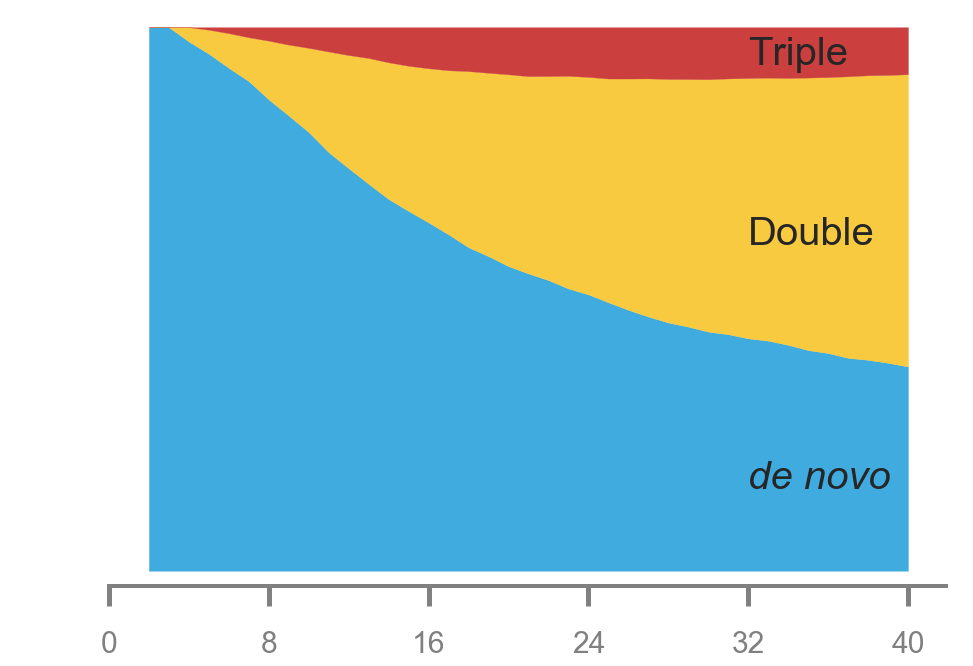

In [37]:
d_tot = np.array(single.mean())[1:]

dn = np.array(single_dn.mean())[1:]
dsin = np.array(single_dou.mean())[1:]
dtri = np.array(single_tri.mean())[1:]

x = np.arange(2, 41, 1)
fig = plt.figure(figsize=(15,10))
plt.rcParams.update({'font.family': 'Arial'})
plt.rcParams.update({'font.size': 40})
ax = fig.add_subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['left'].set_linewidth(4)
ax.spines['bottom'].set_linewidth(4)
ax.spines['bottom'].set_color('grey')
ax.spines['left'].set_color('white')
ax.spines['left'].set_position(('outward', 15))
ax.spines['bottom'].set_position(('outward', 15))

ax.fill_between(x, np.zeros(39), np.divide(dn, d_tot), alpha=1, zorder=4, 
    color='#40ABDF')
ax.fill_between(x, np.divide(dn, d_tot), np.divide(dn, d_tot) + 
    np.divide(dsin, d_tot), alpha=1, zorder=4, color='#F8CA40')
ax.fill_between(x, np.divide(dn, d_tot) + np.divide(dsin, d_tot), 
    np.divide(dn, d_tot) + np.divide(dsin, d_tot) + np.divide(dtri, d_tot), 
    alpha=1, zorder=4, color='#CC3F3F')

plt.tick_params(axis='x', which='both', bottom='on', top='off',
    labelbottom='on', size=20, width=5, direction='out', pad=25, colors='grey')
plt.tick_params(axis='y', which='both', left='on', right='off',
    labelbottom='on', size=20, width=5, direction='out', pad=25, colors='white')
plt.ylim(0,1)
plt.xticks([  0,   8.,  16.,  24.,  32.,  40.], [  0,   8,  16,  24,  32,  40])

plt.text(32,0.15, 'de novo', zorder=5, style='italic')
plt.text(32,0.6, 'Double', zorder=5)
plt.text(32,0.93, 'Triple', zorder=5);

## Inviable double introgressions

In [38]:
double_dn = []
double_sin = []
double_tri = []
for i in stat.values():
    a, b, c = complexify_double(i)
    a_n = np.array([len(j) for j in a])
    b_n = np.array([len(j) for j in b])
    c_n = np.array([len(j) for j in c])
    a_inv, b_inv, c_inv = complexify_double_inv(i)
    a_inv_n = np.array([len(j) for j in a_inv])
    b_inv_n = np.array([len(j) for j in b_inv])
    c_inv_n = np.array([len(j) for j in c_inv])
    double_dn.append((a_n + a_inv_n)/ 2.)
    double_sin.append((b_n + b_inv_n)/ 2.)
    double_tri.append((c_n + c_inv_n)/ 2.)
double_dn = pd.DataFrame(double_dn)
double_sin = pd.DataFrame(double_sin)
double_tri = pd.DataFrame(double_tri)

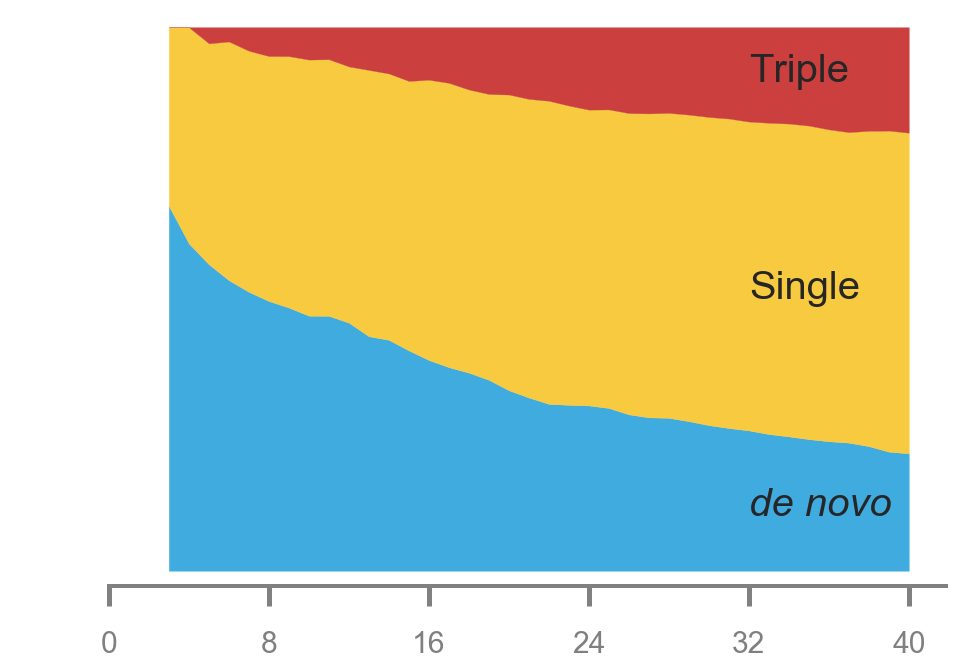

In [39]:
d_tot = np.array(double.mean())[2:]

dn = np.array(double_dn.mean())[2:]
dsin = np.array(double_sin.mean())[2:]
dtri = np.array(double_tri.mean())[2:]

x = np.arange(3, 41, 1)
fig = plt.figure(figsize=(15,10))
plt.rcParams.update({'font.family': 'Arial'})
plt.rcParams.update({'font.size': 40})
ax = fig.add_subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['left'].set_linewidth(4)
ax.spines['bottom'].set_linewidth(4)
ax.spines['bottom'].set_color('grey')
ax.spines['left'].set_color('white')
ax.spines['left'].set_position(('outward', 15))
ax.spines['bottom'].set_position(('outward', 15))

ax.fill_between(x, np.zeros(38), np.divide(dn, d_tot), alpha=1, zorder=4, 
    color='#40ABDF')
ax.fill_between(x, np.divide(dn, d_tot), np.divide(dn, d_tot) + 
    np.divide(dsin, d_tot), alpha=1, zorder=4, color='#F8CA40')
ax.fill_between(x, np.divide(dn, d_tot) + np.divide(dsin, d_tot), 
    np.divide(dn, d_tot) + np.divide(dsin, d_tot) + np.divide(dtri, d_tot), 
    alpha=1, zorder=4, color='#CC3F3F')

plt.tick_params(axis='x', which='both', bottom='on', top='off',
    labelbottom='on', size=20, width=5, direction='out', pad=25, colors='grey')
plt.tick_params(axis='y', which='both', left='on', right='off',
    labelbottom='on', size=20, width=5, direction='out', pad=25, colors='white')
plt.ylim(0,1)
plt.yticks(np.linspace(0, 1, 3), [0, 0.5, 1])
plt.xticks([  0,   8.,  16.,  24.,  32.,  40.], [  0,   8,  16,  24,  32,  40])

plt.text(32,0.1, 'de novo', zorder=5, style='italic')
plt.text(32,0.5, 'Single', zorder=5)
plt.text(32,0.9, 'Triple', zorder=5);

## Inviable triple introgressions

In [40]:
triple_dn = []
triple_sin = []
triple_dou = []
for i in stat.values():
    a, b, c = complexify_triple(i)
    a_n = np.array([len(j) for j in a])
    b_n = np.array([len(j) for j in b])
    c_n = np.array([len(j) for j in c])
    a_inv, b_inv, c_inv = complexify_triple_inv(i)
    a_inv_n = np.array([len(j) for j in a_inv])
    b_inv_n = np.array([len(j) for j in b_inv])
    c_inv_n = np.array([len(j) for j in c_inv])
    triple_dn.append((a_n + a_inv_n)/ 2.)
    triple_sin.append((b_n + b_inv_n)/ 2.)
    triple_dou.append((c_n + c_inv_n)/ 2.)
triple_dn = pd.DataFrame(triple_dn)
triple_sin = pd.DataFrame(triple_sin)
triple_dou = pd.DataFrame(triple_dou)

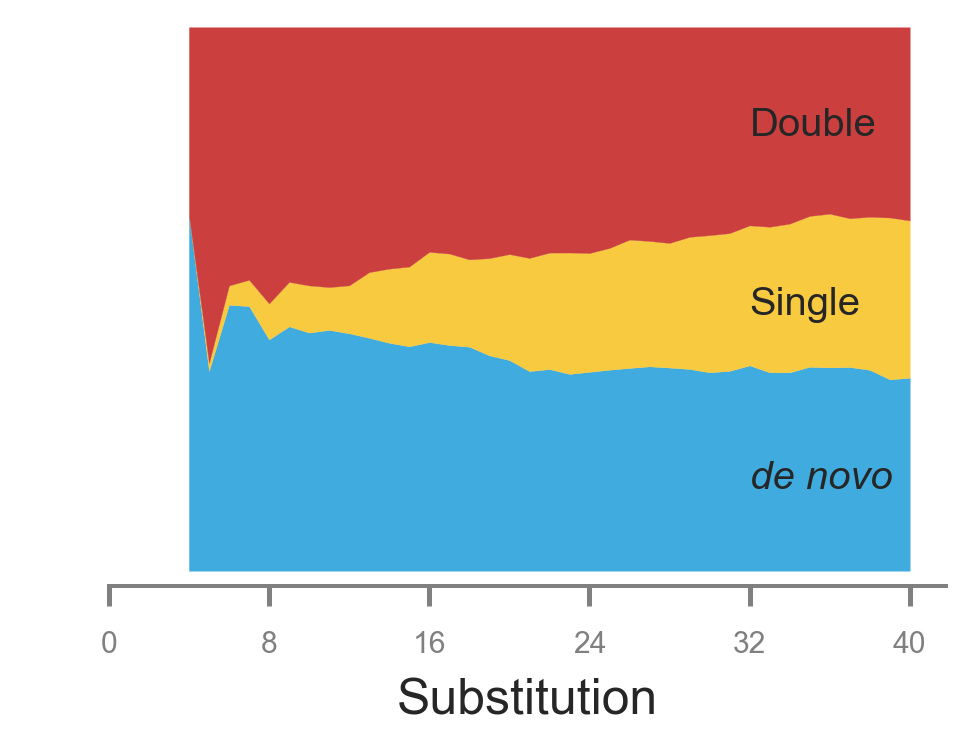

In [41]:
d_tot = np.array(triple.mean())[3:]

dn = np.array(triple_dn.mean())[3:]
dsin = np.array(triple_sin.mean())[3:]
dtri = np.array(triple_dou.mean())[3:]

x = np.arange(4, 41, 1)
fig = plt.figure(figsize=(15,10))
plt.rcParams.update({'font.family': 'Arial'})
plt.rcParams.update({'font.size': 40})
ax = fig.add_subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['left'].set_linewidth(4)
ax.spines['bottom'].set_linewidth(4)
ax.spines['bottom'].set_color('grey')
ax.spines['left'].set_color('white')
ax.spines['left'].set_position(('outward', 15))
ax.spines['bottom'].set_position(('outward', 15))

ax.fill_between(x, np.zeros(37), np.divide(dn, d_tot), alpha=1, zorder=4, 
    color='#40ABDF')
ax.fill_between(x, np.divide(dn, d_tot), np.divide(dn, d_tot) + 
    np.divide(dsin, d_tot), alpha=1, zorder=4, color='#F8CA40')
ax.fill_between(x, np.divide(dn, d_tot) + np.divide(dsin, d_tot), 
    np.divide(dn, d_tot) + np.divide(dsin, d_tot) + np.divide(dtri, d_tot), 
    alpha=1, zorder=4, color='#CC3F3F')

plt.tick_params(axis='x', which='both', bottom='on', top='off',
    labelbottom='on', size=20, width=5, direction='out', pad=25, colors='grey')
plt.tick_params(axis='y', which='both', left='on', right='off',
    labelbottom='on', size=20, width=5, direction='out', pad=25, colors='white')
plt.ylim(0,1)
plt.yticks(np.linspace(0, 1, 3), [0, 0.5, 1])
plt.xticks([  0,   8.,  16.,  24.,  32.,  40.], [  0,   8,  16,  24,  32,  40])

plt.text(32,0.15, 'de novo', zorder=5, style='italic')
plt.text(32,0.47, 'Single', zorder=5)
plt.text(32,0.8, 'Double', zorder=5)

plt.xlabel(r'Substitution', fontsize= 50, labelpad=20);

# Figure 8: Reproductive isolation does not snowball

In [42]:
RI = []
for i in stat.values():
    RI.append(i['RI'])
RI = pd.DataFrame(RI)

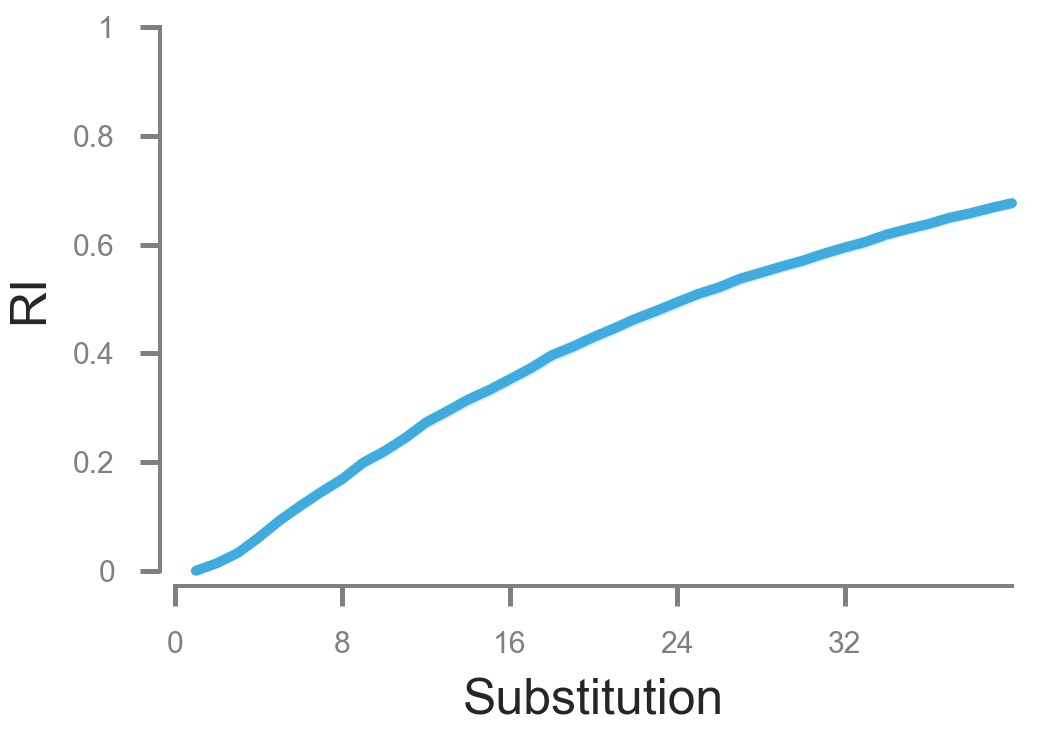

In [43]:
x = np.arange(1, 41, 1)
fig = plt.figure(figsize=(15,10))
plt.rcParams.update({'font.family': 'Arial'})
plt.rcParams.update({'font.size': 40})
ax = fig.add_subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['left'].set_linewidth(4)
ax.spines['bottom'].set_linewidth(4)
ax.spines['bottom'].set_color('grey')
ax.spines['left'].set_color('grey')
ax.spines['left'].set_position(('outward', 15))
ax.spines['bottom'].set_position(('outward', 15))

err = 1.96 * RI.std() / np.sqrt(len(RI))
plt.errorbar(x, RI.mean(), linewidth=10, clip_on=False, color='#40ABDF', 
    zorder=1)
ax.fill_between(x, RI.mean() - err, RI.mean() + err, alpha=.2, color='#40ABDF',
    zorder=1)

plt.tick_params(axis='x', which='both', bottom='on', top='off',
    labelbottom='on', size=20, width=5, direction='out', pad=25, colors='grey')
plt.tick_params(axis='y', which='both', left='on', right='off',
    labelbottom='on', size=20, width=5, direction='out', pad=25, colors='grey')
plt.ylabel(r'RI', fontsize= 50, labelpad=20)
plt.xlabel(r'Substitution', fontsize= 50, labelpad=20)
plt.yticks(np.linspace(0, 1, 6), [ 0 ,  0.2,  0.4,  0.6,  0.8,  1 ])
plt.xticks([  0.,  8.,  16.,  24.,  32.,  40.06], [0, 8, 16, 24, 32, 40])
plt.ylim(0)
plt.xlim(0, 40);

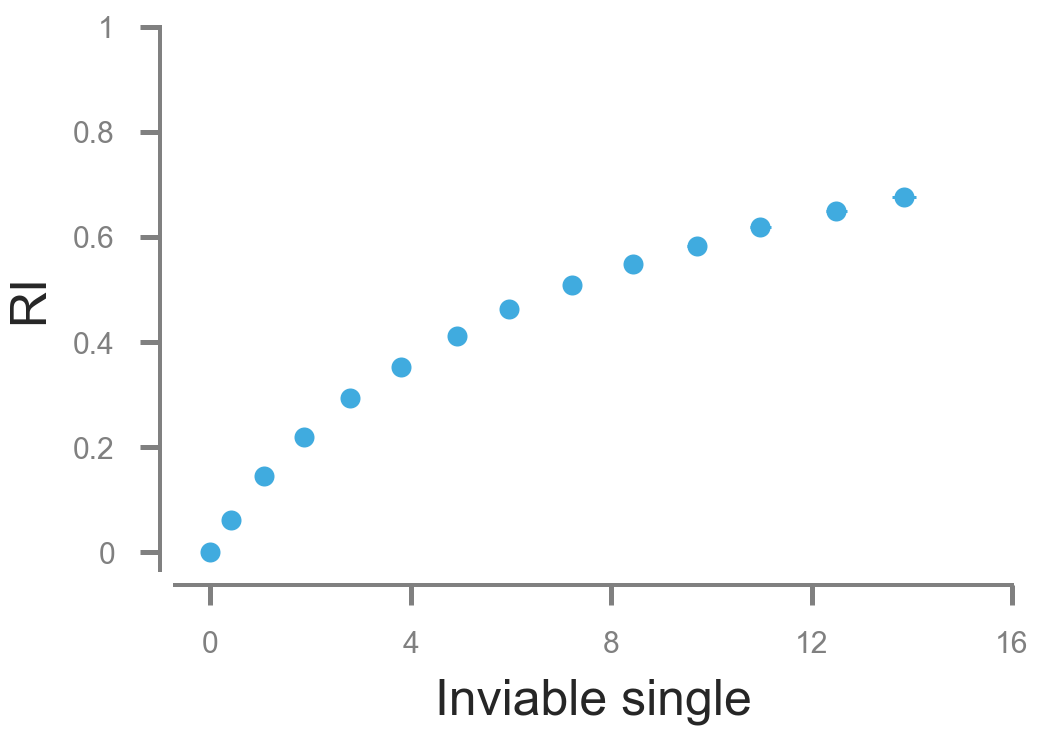

In [44]:
fig = plt.figure(figsize=(15,10))
plt.rcParams.update({'font.family': 'Arial'})
plt.rcParams.update({'font.size': 40})
ax = fig.add_subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['left'].set_linewidth(4)
ax.spines['bottom'].set_linewidth(4)
ax.spines['bottom'].set_color('grey')
ax.spines['left'].set_color('grey')
ax.spines['left'].set_position(('outward', 15))
ax.spines['bottom'].set_position(('outward', 15))

plt.errorbar(single.mean()[::3], RI.mean()[::3], 
    yerr=1.96*RI.std()[::3]/np.sqrt(len(RI)),
    xerr=1.96*single.std()[::3]/np.sqrt(len(single)), 
    fmt='o', linewidth=3, capsize=0, zorder=3, markersize=20, clip_on=False, 
    mew=0.01, elinewidth=3, color='#40ABDF', ecolor='#40ABDF')

plt.tick_params(axis='x', which='both', bottom='on', top='off',
    labelbottom='on', size=20, width=5, direction='out', pad=25, colors='grey')
plt.tick_params(axis='y', which='both', left='on', right='off',
    labelbottom='on', size=20, width=5, direction='out', pad=25, colors='grey')
plt.ylabel(r'RI', fontsize= 50, labelpad=20)
plt.xlabel(r'Inviable single', fontsize= 50, labelpad=20)

plt.yticks(np.linspace(0, 1, 6), [ 0 ,  0.2,  0.4,  0.6,  0.8,  1 ])
plt.xticks(np.linspace(0, 16, 5));

# Figure 9: The structure of the fitness landscape influences the accumulation of DMIs

In [45]:
data = pd.read_csv('bp_12_introgr.csv')
del data['Unnamed: 0']
data.head()

,ref bp,holeyness,final_single,final_double,final_triple
0,29,0.503231,9.0,24.0,35.5
1,25,0.739809,22.5,6.5,8.5
2,24,0.611972,15.0,9.0,24.5
3,19,0.536040,12.0,13.5,8.0
4,29,0.590969,12.0,11.0,31.0


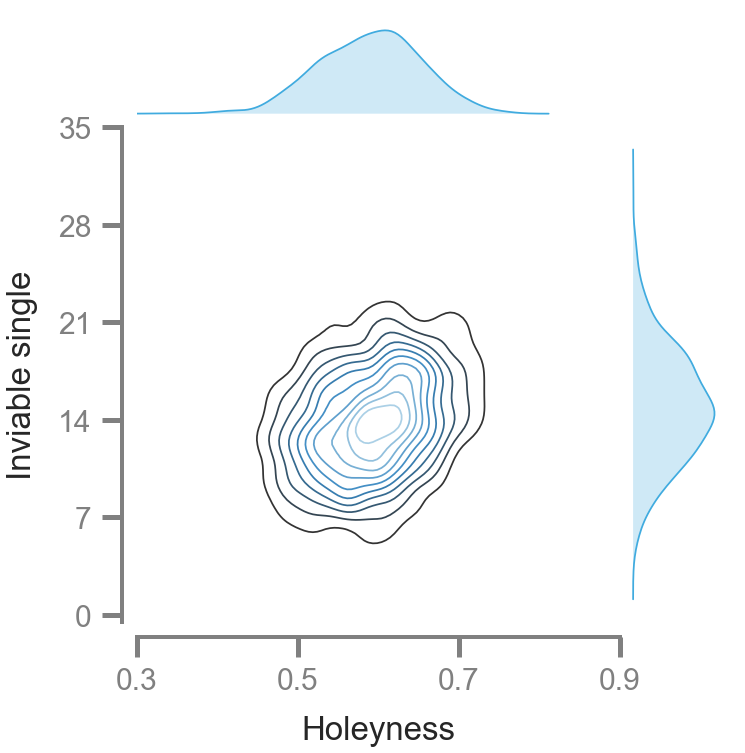

In [46]:
g = sns.JointGrid(x=data['holeyness'], y=data['final_single'], size=11, 
    space=0.1, xlim=(0.3, 0.9))
g = g.plot_joint(sns.kdeplot, cmap="Blues_d")
g = g.plot_marginals(sns.kdeplot, color='#40ABDF', shade=True)
g.ax_joint.set_xticks(np.linspace(0.3, 0.9, 4))
g.ax_joint.set_yticks(np.linspace(0, 35, 6))
g.ax_joint.set_xlabel('Holeyness', labelpad=20)
g.ax_joint.set_ylabel('Inviable single', labelpad=20)
g.ax_marg_x.set_axis_off()
g.ax_marg_y.set_axis_off()
g.ax_joint.tick_params(width=5, pad=10)
g.ax_joint.spines['left'].set_position(('outward', 15))
g.ax_joint.spines['bottom'].set_position(('outward', 15))